# 1. 让我们一起开心的EDA（数据探索）吧

In [1]:
import numpy as np
import pandas as pd
import json

In [2]:
USvideos = pd.read_csv('../input/USvideos.csv',encoding='utf8',error_bad_lines = False)
GBvideos = pd.read_csv('../input/GBvideos.csv',encoding='utf8',error_bad_lines = False)
UScomments = pd.read_csv('../input/UScomments.csv',encoding='utf8',error_bad_lines = False) 
GBcomments = pd.read_csv('../input/GBcomments.csv',encoding='utf8',error_bad_lines = False) 

with open('../input/US_category_id.json') as file:    
    US_category_id = json.load(file)

with open('../input/GB_category_id.json') as file:    
    GB_category_id = json.load(file)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'
b'Skipping line 2398: expected 11 fields, saw 21\nSkipping line 2797: expected 11 fields, saw 21\n'
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
b'Skipping line 

## 让我看看是这些都是什么鬼

In [3]:
USvideos.sample(frac=0.01).head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
6606,tUXLO8Dtvq4,Most Dangerous Jobs,The Infographics Show,27,Most Dangerous Jobs|what are the most dangerou...,445638,7781,731,2482,https://i.ytimg.com/vi/tUXLO8Dtvq4/default.jpg,16.10
2790,mlxdnyfkWKQ,Bear in Russian traffic,Niks Ļeoņenko,23,scary|funny|russia|prikol|car|traffic|sidecar|...,201549,1944,101,260,https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg,26.09
5482,G0cDl-vZKkg,NEW SHADE! MILANI CONCEAL + PERFECT 2 in 1 Fou...,thataylaa,26,milani 2 in 1 foundation|milani 001A|new shade...,239292,11282,558,2341,https://i.ytimg.com/vi/G0cDl-vZKkg/default.jpg,10.10
6752,Hhg7Cv50SWY,After Show: Lea Michele Rates John Stamos’ Kis...,Watch What Happens Live with Andy Cohen,24,What What Happens live|reality|interview|fun|c...,30643,179,24,28,https://i.ytimg.com/vi/Hhg7Cv50SWY/default.jpg,16.10
3680,pgCtsVdK4HA,Joe Goes To The Juggalo March,Joe Goes,23,Juggalo March|Juggalo|March|Washington D.C.|D....,58907,2820,97,481,https://i.ytimg.com/vi/pgCtsVdK4HA/default.jpg,1.10


In [4]:
GBvideos.sample(frac=0.01).head() 

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
2134,Bn7ZtoFTm2Y,Super Glowy Skin + Makeup with No Foundation! ...,Ingrid Nilsen,26,Super Glowy Skin + Makeup with No Foundation! ...,122657,4744,207,286,https://i.ytimg.com/vi/Bn7ZtoFTm2Y/default.jpg,23.09
552,wP97gsUp4cM,El Día Después (11/09/2017): El primer día d...,El Día Después,17,el dia despues|movistar+|movistar plus|movista...,307070,5903,88,298,https://i.ytimg.com/vi/wP97gsUp4cM/default.jpg,15.09
7340,YgEjI5PZa78,Audiophile or Audio-Fooled? How Good Are Your ...,Rick Beato,10,Rick Beato|Everything Music|Golden Ears|Tony M...,31565,1868,73,847,https://i.ytimg.com/vi/YgEjI5PZa78/default.jpg,19.10
3246,MuhbA_bB418,RAPPING FOR A JOB AT VAYNERMEDIA,DKIRK,10,garyvee|gary vaynerchuk|vaynermedia|job|DAMN.|...,1171105,24399,1521,1868,https://i.ytimg.com/vi/MuhbA_bB418/default.jpg,29.09
3252,SnSR3LIXE0o,THE WHOLE CREW BACK TOGETHER,Jim Chapman,26,jim chapman|vlog|fun|funny|british|youtuber|vl...,36322,2903,23,113,https://i.ytimg.com/vi/SnSR3LIXE0o/default.jpg,29.09


In [5]:
USvideos['video_id'].value_counts().head(5)

LunHybOKIjU    8
Hlt3rA-oDao    8
Oo0NJsr5m4I    8
mlxdnyfkWKQ    7
rgbnZG85IRo    7
Name: video_id, dtype: int64

In [6]:
GBvideos['video_id'].value_counts().head(5)

LunHybOKIjU    12
Q0CbN8sfihY    12
r9-DM9uBtVI    11
t3AVtQkEHaE    11
uE6iQ5HiJts    10
Name: video_id, dtype: int64

In [7]:
USvideos.isna().sum()

video_id          0
title             0
channel_title     0
category_id       0
tags              0
views             0
likes             0
dislikes          0
comment_total     0
thumbnail_link    0
date              0
dtype: int64

In [8]:
GBvideos.isna().sum()

video_id          0
title             0
channel_title     0
category_id       0
tags              0
views             0
likes             0
dislikes          0
comment_total     0
thumbnail_link    0
date              0
dtype: int64

## 虽然没有缺但是可能有重，现在试探一下去重
### 从上面分析可以看出，video_id不是唯一的，接下来看看每一日的video_id是否唯一
### 在此之前要先看看date有没有异常

In [9]:
print (USvideos['date'].unique())
print (GBvideos['date'].unique())

[13.09 14.09 15.09 16.09 17.09 18.09 19.09 20.09 21.09 22.09 23.09 24.09
 25.09 26.09 27.09 28.09 29.09 30.09  1.1   2.1   3.1   4.1   5.1   6.1
  7.1   8.1   9.1  10.1  11.1  12.1  13.1  14.1  15.1  16.1  17.1  18.1
 19.1  20.1  21.1  22.1 ]
[13.09 14.09 15.09 16.09 17.09 18.09 19.09 20.09 21.09 22.09 23.09 24.09
 25.09 26.09 27.09 28.09 29.09 30.09  1.1   2.1   3.1   4.1   5.1   6.1
  7.1   8.1   9.1  10.1  11.1  12.1  13.1  14.1  15.1  16.1  17.1  18.1
 19.1  20.1  21.1  22.1 ]


In [10]:
USvideos['id_date'] = USvideos['video_id'].astype(str) + USvideos['date'].astype(str)
GBvideos['id_date'] = GBvideos['video_id'].astype(str) + GBvideos['date'].astype(str)
print(USvideos['id_date'].nunique() == USvideos.shape[0])
print(GBvideos['id_date'].nunique() == GBvideos.shape[0])

False
True


### 不幸的是有重复的，看一下是不是重了哈？

In [11]:
dup_id_dates = USvideos['id_date'][USvideos['id_date'].duplicated()].values
logi = [e in dup_id_dates for e in USvideos['id_date'].values]
dups_df = USvideos[logi].sort_values(by='id_date')
dups_df

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date,id_date
1645,7Cn0-CwintU,Kim Kardashian West Answers Ellen’s Burning Qu...,TheEllenShow,24,Kim|kardashian|kim kardashian west|the kardash...,854205,13450,1932,1064,https://i.ytimg.com/vi/7Cn0-CwintU/default.jpg,21.09,7Cn0-CwintU21.09
1652,7Cn0-CwintU,Kim Kardashian West Answers Ellen’s Burning Qu...,TheEllenShow,24,Kim|kardashian|kim kardashian west|the kardash...,854375,13452,1932,1064,https://i.ytimg.com/vi/7Cn0-CwintU/default.jpg,21.09,7Cn0-CwintU21.09
1648,BwYPddy_5bk,Why Cities?,vlogbrothers,22,history|ancient history|john green|nerdfighter...,175570,9311,73,1005,https://i.ytimg.com/vi/BwYPddy_5bk/default.jpg,21.09,BwYPddy_5bk21.09
1657,BwYPddy_5bk,Why Cities?,vlogbrothers,22,history|ancient history|john green|nerdfighter...,175570,9311,73,1011,https://i.ytimg.com/vi/BwYPddy_5bk/default.jpg,21.09,BwYPddy_5bk21.09
1649,JtZo62mPEKM,KUWTK | Keep It Kardashian: Back to the Start ...,E! Entertainment,24,Kardashians|Real Time|Kim Kardashian|Kourtney ...,787307,11457,509,1080,https://i.ytimg.com/vi/JtZo62mPEKM/default.jpg,21.09,JtZo62mPEKM21.09
1655,JtZo62mPEKM,KUWTK | Keep It Kardashian: Back to the Start ...,E! Entertainment,24,Kardashians|Real Time|Kim Kardashian|Kourtney ...,787579,11457,509,1080,https://i.ytimg.com/vi/JtZo62mPEKM/default.jpg,21.09,JtZo62mPEKM21.09
1646,Tm8LGxTLtQk,One More Light (Official Video) - Linkin Park,Linkin Park,10,Linkin Park|Chester Bennington|One More Light|...,6295987,561556,5248,50192,https://i.ytimg.com/vi/Tm8LGxTLtQk/default.jpg,21.09,Tm8LGxTLtQk21.09
1654,Tm8LGxTLtQk,One More Light (Official Video) - Linkin Park,Linkin Park,10,Linkin Park|Chester Bennington|One More Light|...,6296864,561584,5248,50201,https://i.ytimg.com/vi/Tm8LGxTLtQk/default.jpg,21.09,Tm8LGxTLtQk21.09
1647,mlxdnyfkWKQ,Bear in Russian traffic,Niks Ļeoņenko,23,[none],93109,1642,86,307,https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg,21.09,mlxdnyfkWKQ21.09
1650,mlxdnyfkWKQ,Bear in Russian traffic,Niks Ļeoņenko,23,[none],93153,1644,86,307,https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg,21.09,mlxdnyfkWKQ21.09


### 数据似乎是真的有点脏啊，洗刷刷洗刷刷

In [12]:
USvideos = USvideos[[not e for e in logi]] 
print(USvideos['id_date'].nunique() == USvideos.shape[0])

True


In [13]:
from pprint import pprint
pprint(GB_category_id)

{'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2qTj13hkQZk"',
 'items': [{'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
            'id': '1',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Film & Animation'}},
           {'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
            'id': '2',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Autos & Vehicles'}},
           {'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
            'id': '10',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Music'}},
 

In [14]:
pprint(US_category_id)

{'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
            'id': '1',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Film & Animation'}},
           {'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
            'id': '2',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Autos & Vehicles'}},
           {'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
            'id': '10',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Music'}},
 

## 把json格式换成dataframe，方便后面操作

In [15]:
def reform_js(json_obj):
    relevant = json_obj['items']
    cat_ids, assignable, cats = [], [], []
    for item in json_obj['items']:
        cat_ids.append(int(item['id']))
        cats.append(item['snippet']['title'])
        assignable.append(item['snippet']['assignable'])
    return pd.DataFrame({'category_id':cat_ids,'category':cats,'assignable':assignable})

US_category_iddf = reform_js(US_category_id)
GB_category_iddf = reform_js(GB_category_id)

print(US_category_iddf.head())
print(GB_category_iddf.head())

   category_id          category  assignable
0            1  Film & Animation        True
1            2  Autos & Vehicles        True
2           10             Music        True
3           15    Pets & Animals        True
4           17            Sports        True
   category_id          category  assignable
0            1  Film & Animation        True
1            2  Autos & Vehicles        True
2           10             Music        True
3           15    Pets & Animals        True
4           17            Sports        True


## 把这些和前面的数据连起来

In [16]:
USvideos = USvideos.merge(US_category_iddf, on = ('category_id')).drop('category_id',axis=1)
GBvideos = GBvideos.merge(GB_category_iddf, on = ('category_id')).drop('category_id',axis=1)

In [17]:
USvideos.head(5)

,video_id,title,channel_title,tags,views,likes,dislikes,comment_total,thumbnail_link,date,id_date,category,assignable
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,XpVt6Z1Gjjo13.09,Entertainment,True
1,4MkC65emkG4,Hand In Hand A Benefit For Hurricane Relief | MTV,MTV,mtv|video|online|official|tv|television|watch|...,274358,9215,477,838,https://i.ytimg.com/vi/4MkC65emkG4/default.jpg,13.09,4MkC65emkG413.09,Entertainment,True
2,vu_9muoxT50,Colin Cloud: Mind Reader Predicts Your Tweets ...,America's Got Talent,America's Got Talent 2017|america's got talent...,473691,14740,415,1696,https://i.ytimg.com/vi/vu_9muoxT50/default.jpg,13.09,vu_9muoxT5013.09,Entertainment,True
3,ZQK1F0wz6z4,What Do You Want to Eat?!,Wong Fu Productions,panda|what should we eat|buzzfeed|comedy|boyfr...,282858,14870,300,1398,https://i.ytimg.com/vi/ZQK1F0wz6z4/default.jpg,13.09,ZQK1F0wz6z413.09,Entertainment,True
4,5ywKal6-anc,Gigi Hadid Loses High Heel During Fashion Week...,TMZ,TMZ2016FS11221|TMZ|Hollywood|Celebrity|Enterta...,703750,2921,2196,1042,https://i.ytimg.com/vi/5ywKal6-anc/default.jpg,13.09,5ywKal6-anc13.09,Entertainment,True


In [18]:
GBvideos.head(5)

,video_id,title,channel_title,tags,views,likes,dislikes,comment_total,thumbnail_link,date,id_date,category,assignable
0,jt2OHQh0HoQ,Live Apple Event - Apple September Event 2017 ...,Apple Event,apple events|apple event|iphone 8|iphone x|iph...,7426393,78240,13548,705,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,13.09,jt2OHQh0HoQ13.09,Science & Technology,True
1,BRzPaDMeRks,These Are The Best Features Coming To iPhones.,UrAvgConsumer,uravgconsumer|uac|your average consumer|ios 11...,352276,13098,508,1297,https://i.ytimg.com/vi/BRzPaDMeRks/default.jpg,13.09,BRzPaDMeRks13.09,Science & Technology,True
2,8QgMh02JvS8,The $80 Smartphone Challenge,Austin Evans,smartphone|challenge|gadgets|android|budget|ch...,387841,12097,458,1771,https://i.ytimg.com/vi/8QgMh02JvS8/default.jpg,13.09,8QgMh02JvS813.09,Science & Technology,True
3,AR4UgRJOUQY,What Does Your Search History Say About You?,AsapSCIENCE,Search History|Delete Search History|Google Da...,1244984,29748,2639,4112,https://i.ytimg.com/vi/AR4UgRJOUQY/default.jpg,13.09,AR4UgRJOUQY13.09,Science & Technology,True
4,xo2B67vz4HA,Small Hands Samsung Galaxy Note 8 Review,Linus Tech Tips,samsung|galaxy|note 8|review|unboxing|overview...,626419,20553,1033,2138,https://i.ytimg.com/vi/xo2B67vz4HA/default.jpg,13.09,xo2B67vz4HA13.09,Science & Technology,True


In [19]:
UScomments.isna().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [20]:
GBcomments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [21]:
UScomments.head(5)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [22]:
GBcomments.head(5)

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


## 缺失不多，暂不做处理
## 画个我最熟悉的词云玩，嘻嘻

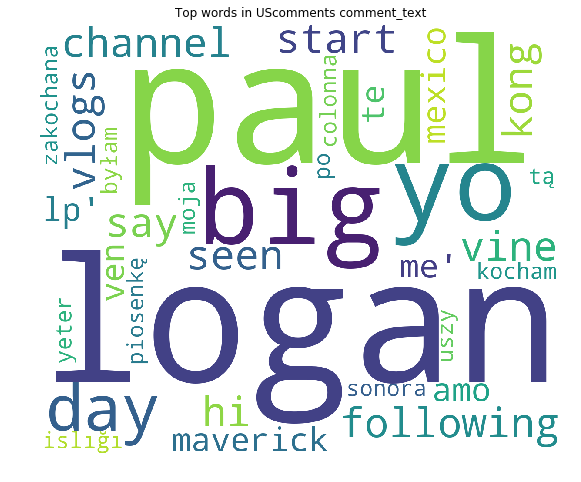

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = "".join(str(UScomments['comment_text'].str.lower().values[-1000000:]))
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.title('Top words in UScomments comment_text')
plt.axis("off")
plt.show()

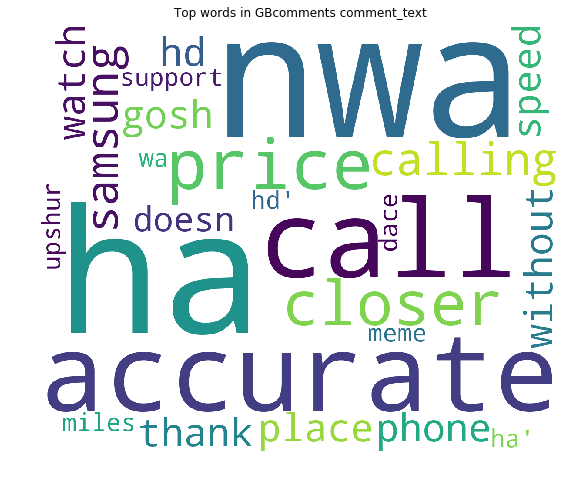

In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = "".join(str(GBcomments['comment_text'].str.lower().values[-1000000:]))
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.title('Top words in GBcomments comment_text')
plt.axis("off")
plt.show()

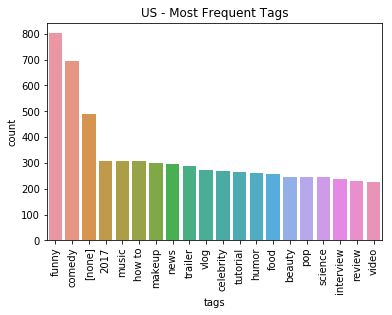

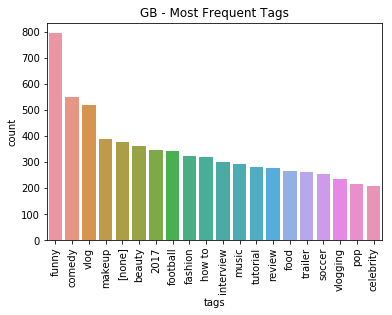

In [25]:
import seaborn as sns
def form_hist(given_list,top_n):
    """
    Returns a sorted histogram dataframe (with top_n rows) for a given list.
    """
    item_set = set(given_list)
    items = []
    counts = []
    for nm in item_set:
        items.append(nm)
        counts.append(given_list.count(nm))
    return pd.DataFrame({'count':counts,'items':items}).sort_values(by='count',ascending=False).head(top_n)

def create_hist(videos, num, title):
    """
    Plots our histogram
    """
    all_tags = videos['tags'].map(lambda k: k.lower().split('|')).values
    all_tags = [item for sublist in all_tags for item in sublist]

    counts = form_hist(all_tags,num)
    counts.columns = ['count','tags']
    plt.figure()
    sns.barplot(x = counts['tags'], y = counts['count'])
    plt.xticks(rotation=90)
    plt.ylabel('count')
    plt.title(title)

create_hist(USvideos,20,'US - Most Frequent Tags')
create_hist(GBvideos,20,'GB - Most Frequent Tags')